# Homework #7: Clustering

__DUE:__ Monday 3/5 11:59am

__HOW TO SUBMIT:__ __We are moving to a new submission system that is powered by git__ We are no longer going to use [WebSubmit](https://www.cs.duke.edu/csed/websubmit/). We have created a SUBMIT repository for almost every one on [coursework gitlab](https://coursework.cs.duke.edu). Make sure you have access to CS216-s2018-stu/your_firstname-your_lastname-SUBMIT; otherwise please contact zjmiao@cs.duke.edu as soon as possible. 

_If this is the first time you are submitting a hw or lab assignment:_

Fire up your VM, open a terminal, type in the following commands to initialize your SUBMIT repository:
```shell
cd ~
git clone git@coursework.cs.duke.edu:CS216-s2018-stu/<Firstname>-<Lastname>-SUBMIT.git SUBMIT
cd SUBMIT
touch README.md
git add README.md
git commit -m "add README"
git push -u origin master
```
Replace `<Firstname>` and `<Lastname>` with your name as it appears on the coursework gitlab page. If this is successful, you should see a new folder SUBMIT in your home directory. 

_How to submit an assignment:_ 

Create a new folder `hw07` directly inside your SUBMIT directory. 
```shell
cd ~/SUBMIT
mkdir hw07
```

And copy all required files (from your local `working` directory, see __WHAT TO SUBMIT__ under each problem below) into it. The sample folder structure should look like this:
```shell
/SUBMIT
/SUBMIT/hw07
/SUBMIT/hw07/hw07.ipynb
```    

Finally, when your are ready to submit your homework, run the commands below:
```shell
cd ~/SUBMIT
git add hw07
git commit -m "updated hw07"
git push
```
You can replace "updated hw06" with any meaningful message you want.

If your submission is successful, you will see your files in your repository on gitlab website.

You can submit multiple times, but __we will only grade the files under /hw07 directory__.

#     0. Getting Started

__WHAT TO SUBMIT:__ Nothing is required for this part.

To get ready for this assignment, open up a VM shell, and type the following command:

```shell
~/CS216-s2018-READONLY/sync.sh
```

Next, type the following commands to create a working directory for this homework. Here we use `hw07` under your `working/` directory, but feel free to change it to another location.

```shell
cd ~
cp -r ~/CS216-s2018-READONLY/assignments/hw07 ~/working/
cd ~/working/hw07
```

# 1. Clustering Reviews

In this exercise we are going to revisit the task of deciphering reviews. In HW #5 where we asked you to guess whether a review was for a laptop or a mobile phone.  This time we are not telling what which categories of products these reviews correspond to. Instead, you are going to find out the categories of products yourself by clustering the reviews.

In the `hw07/` subdirectory, you will find a CSV file named `reviews.csv`, which contains 250 products and one review for each product.  We have provided the Python function `run_kmeans()` that clusters the reviews using `sklearn`'s builtin k-means clustering implementation. You can read its official documentation: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Read the function carefully. Note: 

- we set `n_clusters=2` just as an example and not because there are only 2 clusters in the data. 
- features are created for each review using the `TfidfVectorizer`.

The script clusters the data and prints:
- a score related to the objective function being minimized
- all the ids and the predicted cluster they belong to
- the cluster centers

Yor task is to answer the following questions: 
 - What is your estimate for the best `k` for this dataset?
 - Justify your `k` value using the output of the clustering. 
 
__HINT__: You can modify `run_kmeans()` to loop over many other `k` values and compute measures/visualize the clusters to help you decide what the best `k` is. You can also choose to use a different clustering algorithm if you want. 

__WHAT TO SUBMIT__: type your answers to the two questions in the notebook. Submit the `hw07.ipynb` notebook.

In [1]:
import sys
import numpy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
def run_kmeans():
    # read the poorly formatted CSV:
    with open('reviews.csv', 'r') as f:
        ids = list()
        labels = list()
        reviews = list()
        for line in f:
            fields = line.split(',')
            id = fields[0]
            ids.append(id)
            review = ','.join(fields[1:])
            reviews.append(review)

    # turn each review into a feature vector:
    ## ... using counts
    #vectorizer = CountVectorizer(binary=False)
    ## ... using TFIDFs (note we are removing stop words)
    vectorizer = TfidfVectorizer(stop_words='english')
    vectorizer.fit(reviews)
    
    # 'features' contains the names of the features
    # (i.e., words appearing in the reviews minus the stop words)
    features = vectorizer.get_feature_names()
    # 'X' is the matrix of feature values for the reviews. 
    X = vectorizer.transform(reviews)
    
    # create list for various k-means scores dependent on value of k (clusters)
    # As k increases, the score will decrease because there are more clusters and 
    # the score is a sum of distances b/t point and closest cluster 
    
    k_means_score = []
    for x in range (2,11): #2-10 k values 
        # Cluster using K-Means
        clusterer = KMeans(n_clusters=x, init='k-means++', n_init=10, max_iter=1000)
        clusterer.fit(X)
        score= (-1.0 * clusterer.score(X))
        k_means_score.append(score)
        
    # print k_means_score
    
    plt.xlabel("k")
    plt.ylabel("K-Means Score")
    print plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10], k_means_score)
    
    # print the number of clusters and the objective value
   # print "========================"
   # print "number of clusters = ", 2, " score = ", (-1.0 * clusterer.score(X))

    # print the clusters to which each review is assigned to
   # print "========================"
   # print "Output Clusters:"
   # yhat = clusterer.predict(X)
   # for i in range(len(yhat)):
   #     print ids[i], yhat[i]
    
    # print the cluster centers
   # print "========================"
   # print "Cluster Centers:"
  #  centers = clusterer.cluster_centers_
  #  print centers

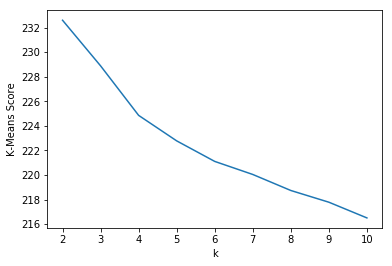

In [3]:
run_kmeans()

**(1)**. What is your estimate for the best `k` for this dataset?

k = 4

**(2)**. Justify your `k` value using the output of the clustering. 

At k=4 there is an obvious change in slope. The slope of the line at k=4 to k=5 is less than the slope from k=1 to k=4, which means the score is not reduced at the same rate when the 5th cluster is added. Therefore a good estimate for the value of k is 4.